# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


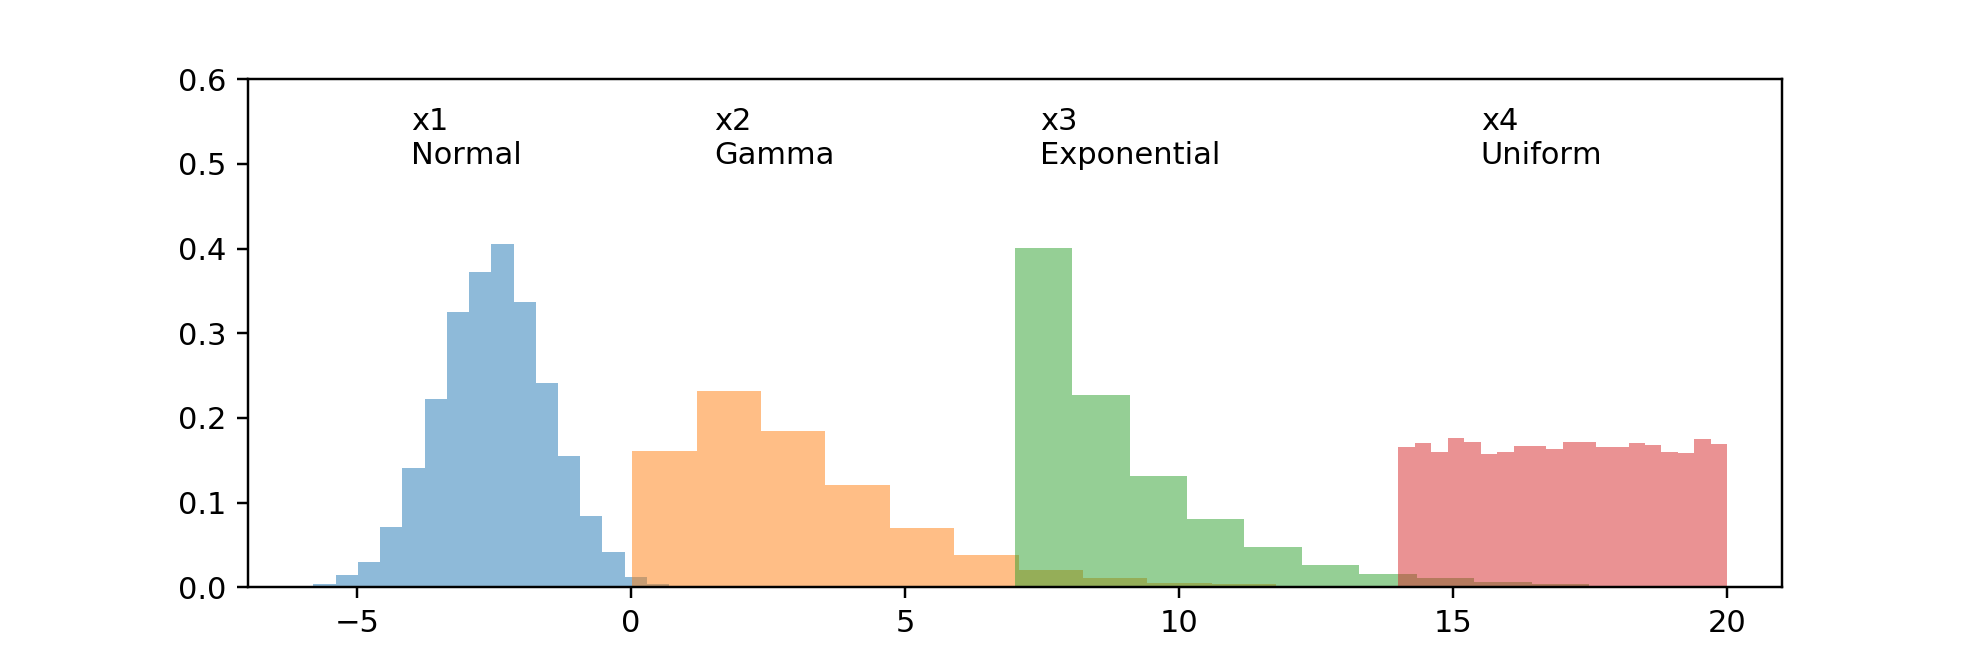

Text(15.5028,0.5,'x4\nUniform')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#%matplotlib inline
%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


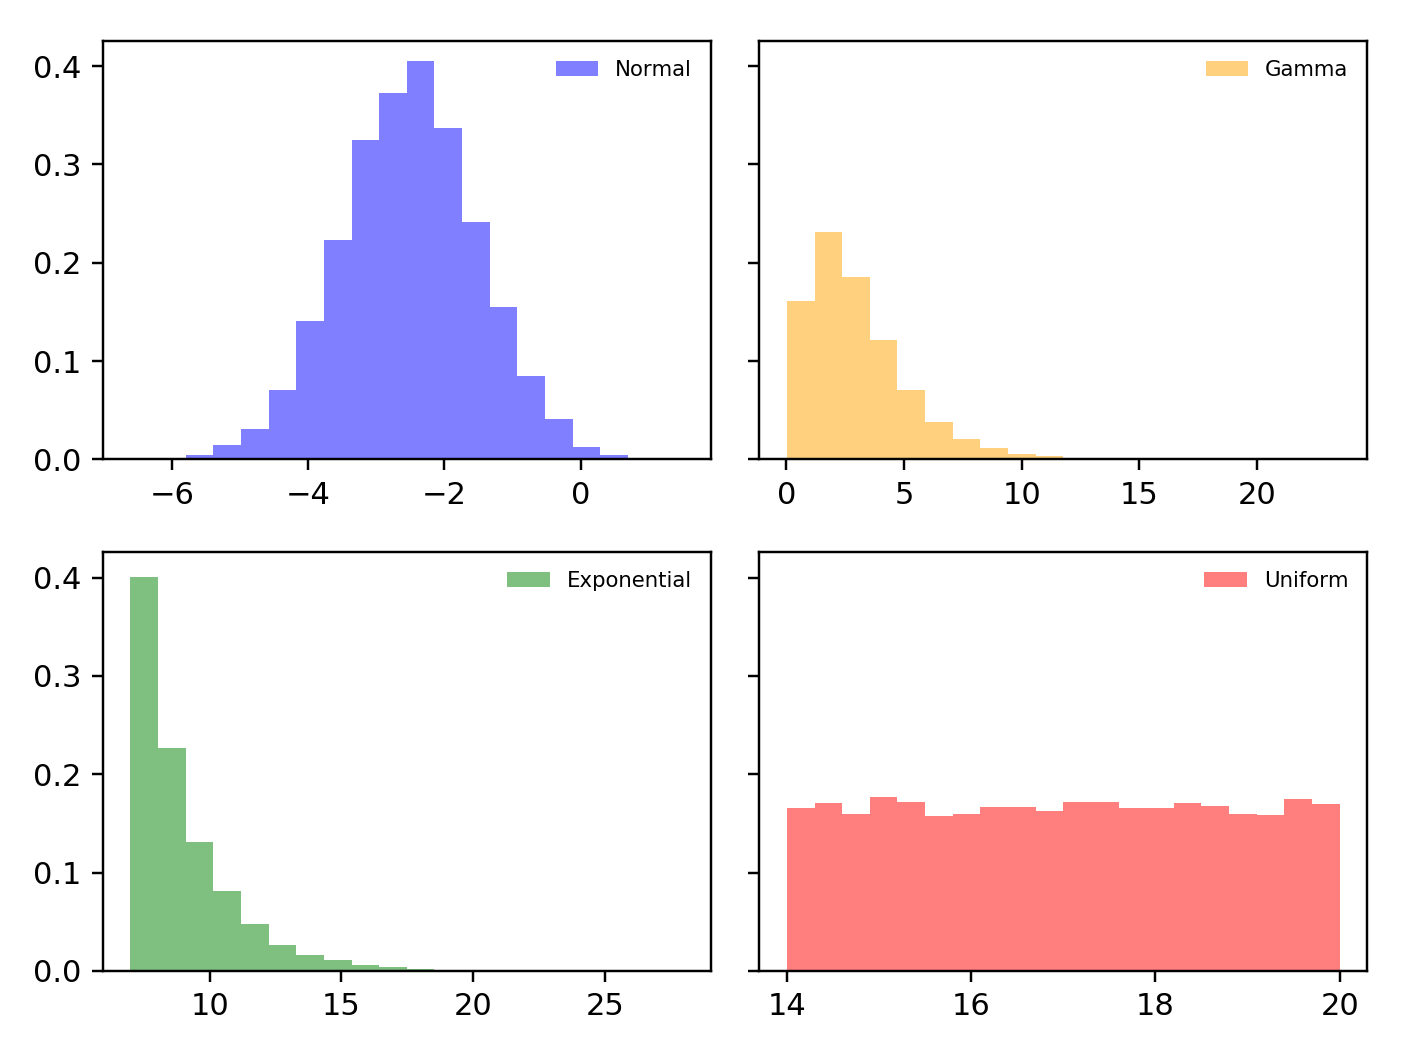

In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey=True)
ax1.hist(x1, normed=True, bins=20, color='blue', alpha=0.5, label='Normal')
ax1.legend(loc='best', frameon=False, fontsize='x-small')
ax2.hist(x2, normed=True, bins=20, color='orange', alpha=0.5, label='Gamma')
ax2.legend(loc='best', frameon=False, fontsize='x-small')
ax3.hist(x3, normed=True, bins=20, color='green', alpha=0.5, label='Exponential')
ax3.legend(loc='best', frameon=False, fontsize='x-small')
ax4.hist(x4, normed=True, bins=20, color='red', alpha=0.5, label='Uniform')
ax4.legend(loc='best', frameon=False, fontsize='x-small')
plt.tight_layout()

In [4]:
n = 100
rc1 = np.random.choice(x1,size=n)
rc2 = np.random.choice(x2,size=n)
rc3 = np.random.choice(x3,size=n)
rc4 = np.random.choice(x4,size=n)

### I know this is super ugly. It needs to be turned into a for loop and much of it parameterized

In [5]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n:
        a.event_source.stop()       
    bins = 10
    ax1.cla()
    ax1.hist(x1[:curr], normed=True, bins=np.arange(-5, -1, 0.2), color='blue', alpha=0.5, label='Normal')
    ax1.set_ylim(0,1)
    ax1.annotate('n = {}'.format(curr), [-5,0.85])
    ax1.set_title("x1 Normal")
    ax1.set_ylabel('Normed Frequency')
    ax2.cla()
    ax2.hist(x2[:curr], normed=True, bins=np.arange(0.0, 10.0, 0.2), color='orange', alpha=0.5, label='Gamma')
    ax2.set_ylim(0,1)
    ax2.annotate('n = {}'.format(curr), [0,0.85])
    ax2.set_title("x2 Gamma")
    ax2.set_ylabel('Normed Frequency')
    ax3.cla()
    ax3.hist(x3[:curr], normed=True, bins=np.arange(6.5, 25.0, 0.2), color='green', alpha=0.5, label='Exponential')
    ax3.set_ylim(0,1)
    ax3.annotate('n = {}'.format(curr), [6.5,0.85])
    ax3.set_title("x3 Exponential")
    ax3.set_ylabel('Normed Frequency')
    ax4.cla()
    ax4.hist(x4[:curr], normed=True, bins=np.arange(14.0, 20.0, 0.2), color='red', alpha=0.5, label='Uniform')
    ax4.set_ylim(0,1)
    ax4.annotate('n = {}'.format(curr), [14,0.85])
    ax4.set_title("x1 Uniform")
    ax4.set_ylabel('Normed Frequency')
    #ax4.legend(loc=0, frameon=False, fontsize='x-small')
    plt.tight_layout()

<IPython.core.display.Javascript object>


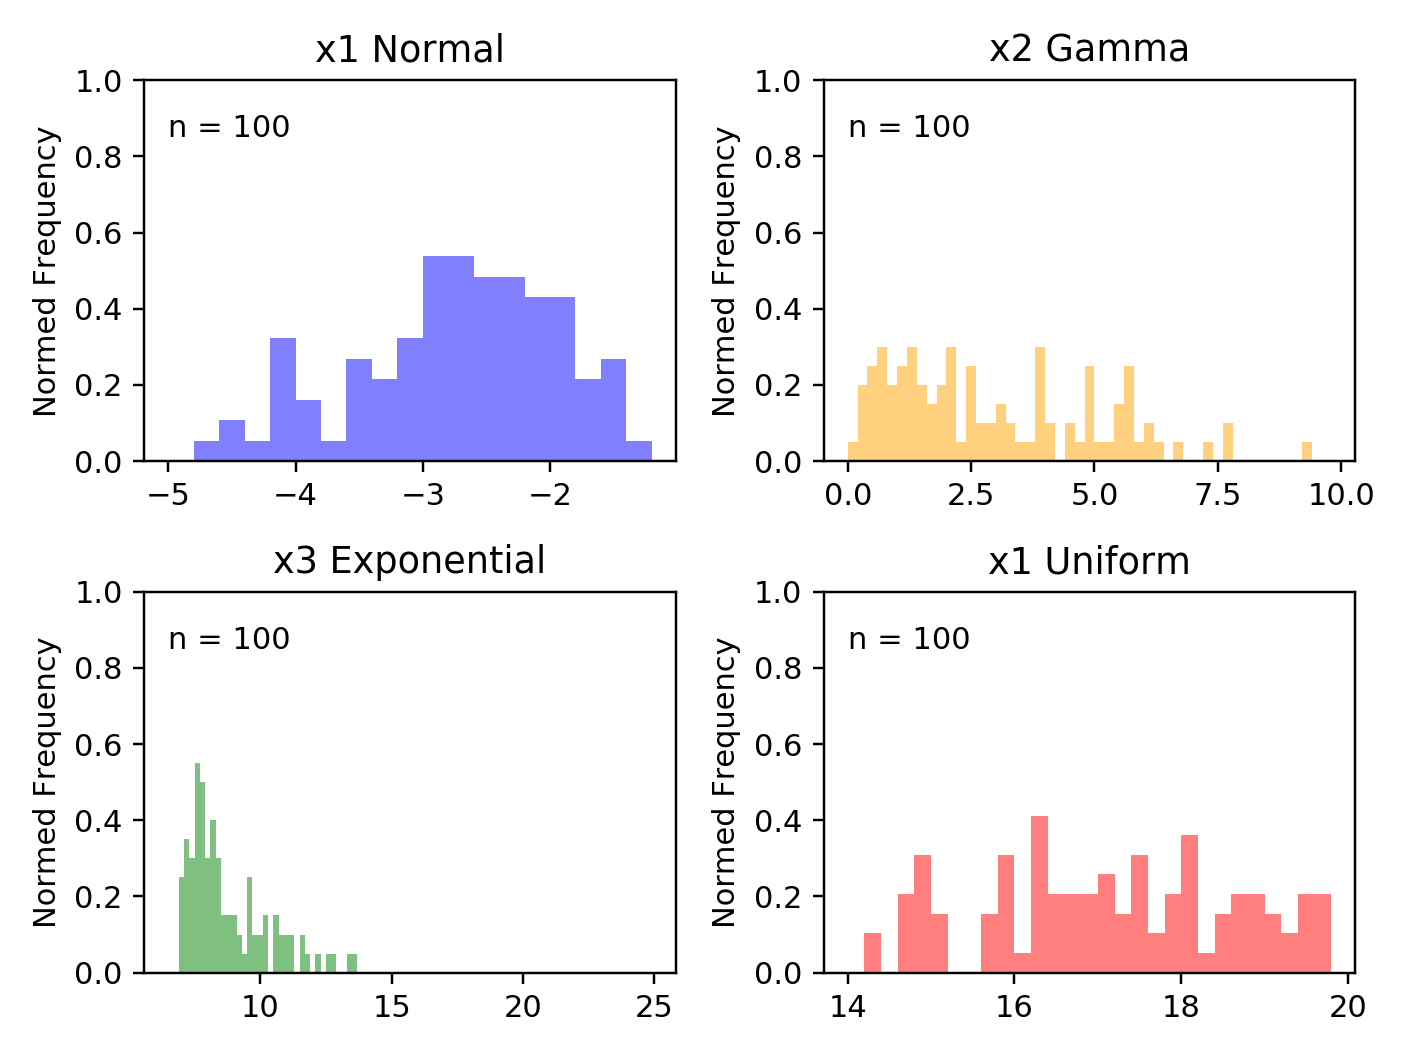

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey=False)
a = animation.FuncAnimation(fig, update, interval=10)
#np.seterr(divide='ignore', invalid='ignore')
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
#a.save('im.mp4', writer=writer)